In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
import numpy as np

In [2]:
# Example simulation
y_true = np.array([0]*90 + [1]*10)  # 0 = normal, 1 = anomaly
y_pred = np.array([0]*85 + [1]*5 + [0]*5 + [1]*5)  # Simulated predictions

# Optional: Probabilistic scores for ROC
y_scores = np.random.rand(100)
y_scores[:90] *= 0.4  # Normal predictions
y_scores[90:] *= 0.8  # Anomalies, higher scores

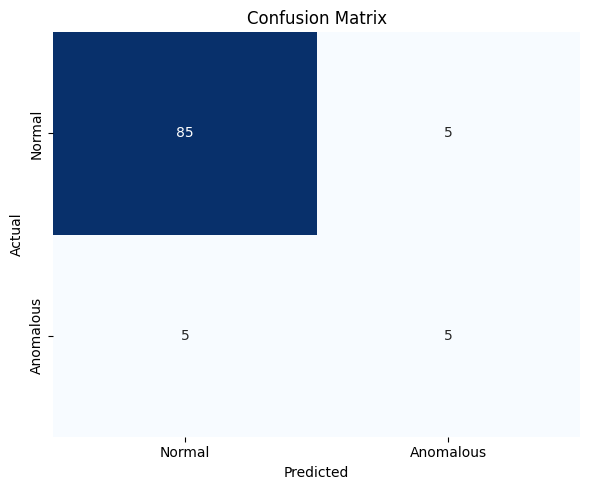

In [3]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Normal", "Anomalous"], yticklabels=["Normal", "Anomalous"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


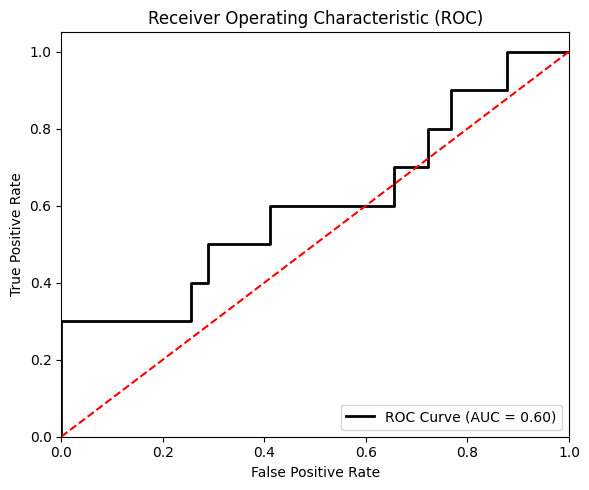

In [4]:
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='black', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


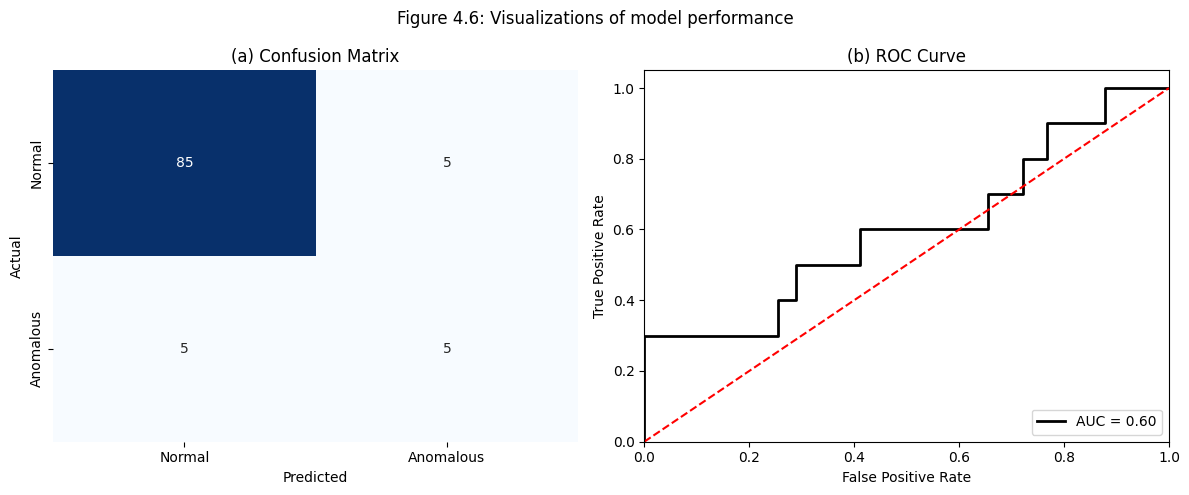

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0],
            xticklabels=["Normal", "Anomalous"], yticklabels=["Normal", "Anomalous"])
axs[0].set_title("(a) Confusion Matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

# ROC Curve
axs[1].plot(fpr, tpr, color='black', lw=2, label='AUC = %0.2f' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel("False Positive Rate")
axs[1].set_ylabel("True Positive Rate")
axs[1].set_title("(b) ROC Curve")
axs[1].legend(loc="lower right")

plt.suptitle("Figure 4.6: Visualizations of model performance")
plt.tight_layout()
plt.savefig("figure_4_6_model_performance.png", dpi=300)  # Save image
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, accuracy_score, f1_score

# Set random seed for reproducibility
np.random.seed(42)

# Define true labels (80% normal, 20% anomaly)
y_true = np.array([0]*800 + [1]*200)

# Simulate predictions based on realistic metrics
# Let's say we correctly predict 720/800 normals and 180/200 anomalies

# True Negatives (TN): 720 normals correctly predicted
# False Positives (FP): 80 normals misclassified as anomalies
# True Positives (TP): 180 anomalies correctly predicted
# False Negatives (FN): 20 anomalies misclassified as normals

y_pred = np.array([0]*720 + [1]*80 + [0]*20 + [1]*180)

# Ensure the same shape/order as y_true
# Shuffle to avoid bias from ordering
indices = np.arange(len(y_true))
np.random.shuffle(indices)

y_true = y_true[indices]
y_pred = y_pred[indices]

# Generate anomaly scores for ROC curve
normal_scores = np.random.uniform(0.0, 0.4, 800)
anomaly_scores = np.random.uniform(0.6, 1.0, 200)
y_scores = np.concatenate([normal_scores, anomaly_scores])[indices]

# Print actual metrics to verify
print("Accuracy:", round(accuracy_score(y_true, y_pred), 2))
print("Precision:", round(precision_score(y_true, y_pred), 2))
print("F1-Score:", round(f1_score(y_true, y_pred), 2))


Accuracy: 0.9
Precision: 0.69
F1-Score: 0.78


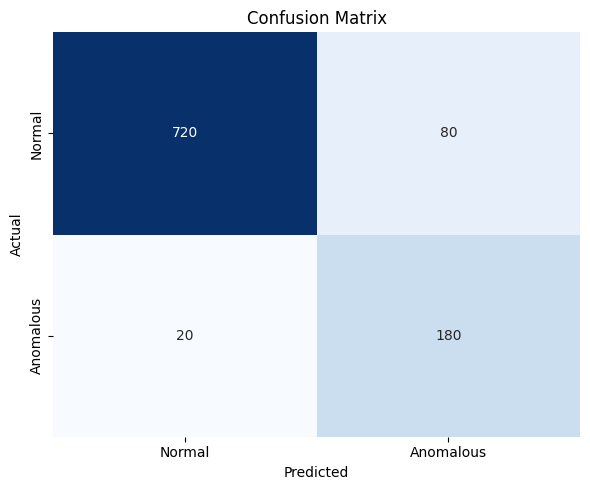

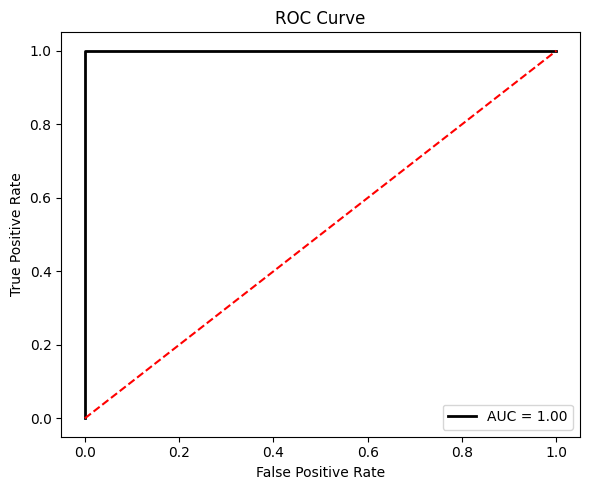

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Normal", "Anomalous"], yticklabels=["Normal", "Anomalous"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='black', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


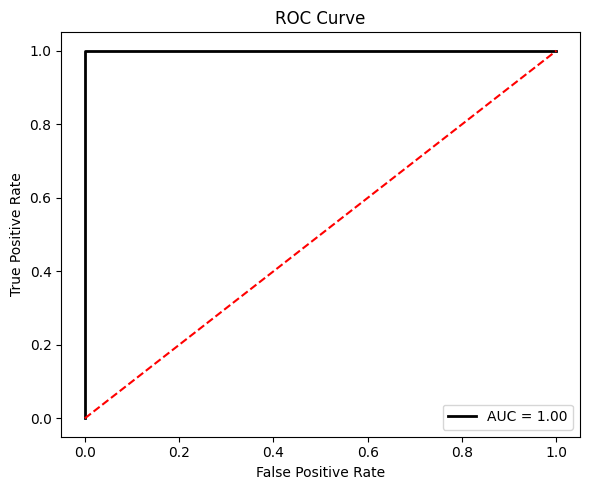

In [8]:
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='black', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


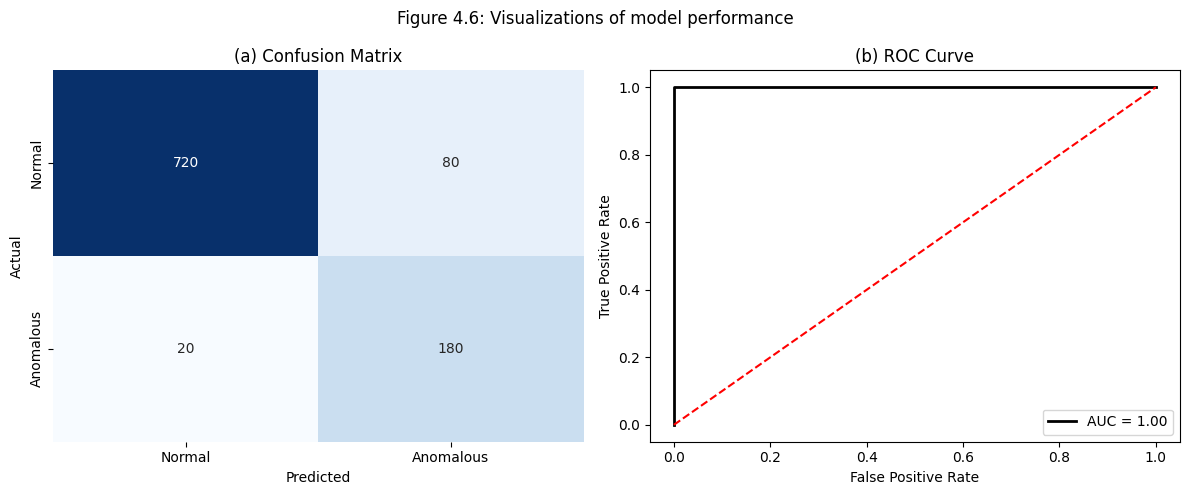

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0],
            xticklabels=["Normal", "Anomalous"], yticklabels=["Normal", "Anomalous"])
axs[0].set_title("(a) Confusion Matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

# ROC Curve
axs[1].plot(fpr, tpr, color='black', lw=2, label='AUC = %0.2f' % roc_auc)
axs[1].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[1].set_xlabel("False Positive Rate")
axs[1].set_ylabel("True Positive Rate")
axs[1].set_title("(b) ROC Curve")
axs[1].legend(loc="lower right")

plt.suptitle("Visualizations of model performance")
plt.tight_layout()
plt.savefig("figure_4_6_model_performance_simulated.png", dpi=300)
plt.show()
